In [62]:
import torch
import numpy as np
from torch2jax import j2t,t2j
import jax
import sys,os
from brax.io.torch import jax_to_torch 
import time
import copy

os.environ['CUDA_VISIBLE_DEVICES'] ='1'
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '.25'

import jax.numpy as jnx

sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))
sys.path.append(os.path.abspath(os.getcwd()))

#jax.config.update("jax_default_device", jax.devices()[2])

from ensemble.ensemble import EnsembleModels

from Trajectory.walker_mpc import Walker_MPC


In [63]:
f_size = (8.0,6.0)
l_wid = 4
t_size = 24
lable_size = 28


In [64]:
from matplotlib import pyplot as plt

In [65]:
#cartpole
cartpole_gt = np.load('../Data/Cartpole/gt.npy')
results_ours =[]
for j in (0,1,2,3,4):
    res = np.load('../Data/Cartpole/RA/error_2/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,52,2):
        results.append(res[str(i)])
    results_ours.append(results)
std_ours = np.std(results_ours,axis=0)
results_ours = np.mean(results_ours,axis=0)

results_BT = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Cartpole/BT/error_2/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,52,2):
        results.append(res[str(i)])
    results_BT.append(results)
std_BT = np.std(results_BT,axis=0)
results_BT  = np.mean(results_BT ,axis=0)

results_RIME = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Cartpole_RIME/error_2/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,52,2):
        results.append(res[str(i)])
    results_RIME.append(results)
std_RIME = np.std(results_RIME,axis=0)
results_RIME  = np.mean(results_RIME ,axis=0)

results_SURF = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Cartpole_SURF/error_2/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,52,2):
        results.append(res[str(i)])
    results_SURF.append(results)
std_SURF = np.std(results_SURF,axis=0)
results_SURF  = np.mean(results_SURF ,axis=0)

results_MAE = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Cartpole_MAE/error_2/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,52,2):
        results.append(res[str(i)])
    results_MAE.append(results)
std_MAE = np.std(results_MAE,axis=0)
results_MAE  = np.mean(results_MAE ,axis=0)

results_tCE = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Cartpole_tCE/error_2/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,52,2):
        results.append(res[str(i)])
    results_tCE.append(results)
std_tCE = np.std(results_tCE,axis=0)
results_tCE  = np.mean(results_tCE ,axis=0)

print('gt',cartpole_gt)
print('ours', results_ours[-1],std_ours[-1])
print('BT', results_BT[-1],std_BT[-1])
print('RIME', results_RIME[-1],std_RIME[-1])
print('SURF', results_SURF[-1],std_SURF[-1])
print('MAE', results_MAE[-1],std_MAE[-1])
print('tCE', results_tCE[-1],std_tCE[-1])

gt 148.63144
ours 130.6829 2.0580544
BT 52.28353 26.828945
RIME 75.0873 45.289097
SURF 97.98141 35.822838
MAE 98.58427 25.860586
tCE 73.26207 16.3309


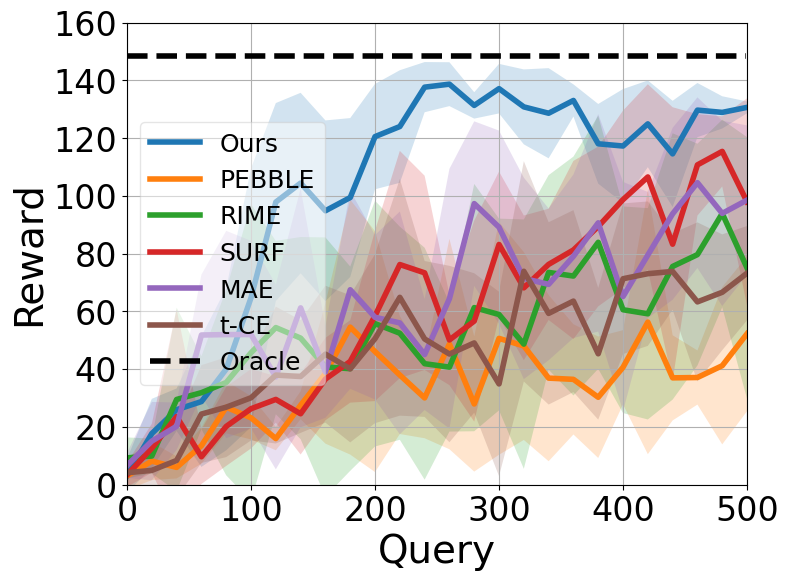

In [66]:
plt.figure(figsize=f_size)
plt.grid()
#plt.title("Cartpole reward: 20% Error")
#plt.title("Cartpole-Swingup",fontsize = 16)
plt.plot(np.arange(0,52,2)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,52,2)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,52,2)*10,results_BT,label='PEBBLE',linewidth = l_wid)
plt.fill_between(np.arange(0,52,2)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)
plt.plot(np.arange(0,52,2)*10,results_RIME,label='RIME',linewidth = l_wid)
plt.fill_between(np.arange(0,52,2)*10,results_RIME-std_RIME,results_RIME+std_RIME,alpha=0.2)
plt.plot(np.arange(0,52,2)*10,results_SURF,label='SURF',linewidth = l_wid)
plt.fill_between(np.arange(0,52,2)*10,results_SURF-std_SURF,results_SURF+std_SURF,alpha=0.2)
plt.plot(np.arange(0,52,2)*10,results_MAE,label='MAE',linewidth = l_wid)
plt.fill_between(np.arange(0,52,2)*10,results_MAE-std_MAE,results_MAE+std_MAE,alpha=0.2)
plt.plot(np.arange(0,52,2)*10,results_tCE,label='t-CE',linewidth = l_wid)
plt.fill_between(np.arange(0,52,2)*10,results_tCE-std_tCE,results_tCE+std_tCE,alpha=0.2)


plt.plot(np.ones(500)*cartpole_gt,label='Oracle',linestyle='dashed', color = 'black',linewidth = l_wid)
plt.legend(fontsize = 18, framealpha=0.5)
plt.ylim(0,160)
plt.xlim(0,500)
plt.xticks(fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)

plt.savefig('../Data/Figs/many_baselines_cartpole_2.jpg',bbox_inches="tight")
# plt.savefig('../Data/Figs/err_3/cartpole.jpg',bbox_inches="tight")

In [67]:
#cartpole
results_ours =[]
for j in (0,1,2,3,4):
    res = np.load('../Data/Cartpole/RA/error_3/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,52,2):
        results.append(res[str(i)])
    results_ours.append(results)
std_ours = np.std(results_ours,axis=0)
results_ours = np.mean(results_ours,axis=0)

results_BT = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Cartpole/BT/error_3/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,52,2):
        results.append(res[str(i)])
    results_BT.append(results)
std_BT = np.std(results_BT,axis=0)
results_BT  = np.mean(results_BT ,axis=0)

results_RIME = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Cartpole_RIME/error_3/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,52,2):
        results.append(res[str(i)])
    results_RIME.append(results)
std_RIME = np.std(results_RIME,axis=0)
results_RIME  = np.mean(results_RIME ,axis=0)

results_SURF = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Cartpole_SURF/error_3/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,52,2):
        results.append(res[str(i)])
    results_SURF.append(results)
std_SURF = np.std(results_SURF,axis=0)
results_SURF  = np.mean(results_SURF ,axis=0)

results_MAE = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Cartpole_MAE/error_3/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,52,2):
        results.append(res[str(i)])
    results_MAE.append(results)
std_MAE = np.std(results_MAE,axis=0)
results_MAE  = np.mean(results_MAE ,axis=0)

results_tCE = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Cartpole_tCE/error_3/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,52,2):
        results.append(res[str(i)])
    results_tCE.append(results)
std_tCE = np.std(results_tCE,axis=0)
results_tCE  = np.mean(results_tCE ,axis=0)

print('gt',cartpole_gt)
print('ours', results_ours[-1],std_ours[-1])
print('BT', results_BT[-1],std_BT[-1])
print('RIME', results_RIME[-1],std_RIME[-1])
print('SURF', results_SURF[-1],std_SURF[-1])
print('MAE', results_MAE[-1],std_MAE[-1])
print('tCE', results_tCE[-1],std_tCE[-1])

gt 148.63144
ours 111.3113 16.83937
BT 42.78637 23.342733
RIME 81.07168 37.09016
SURF 62.337227 42.021786
MAE 59.91639 30.709913
tCE 51.967857 30.48176


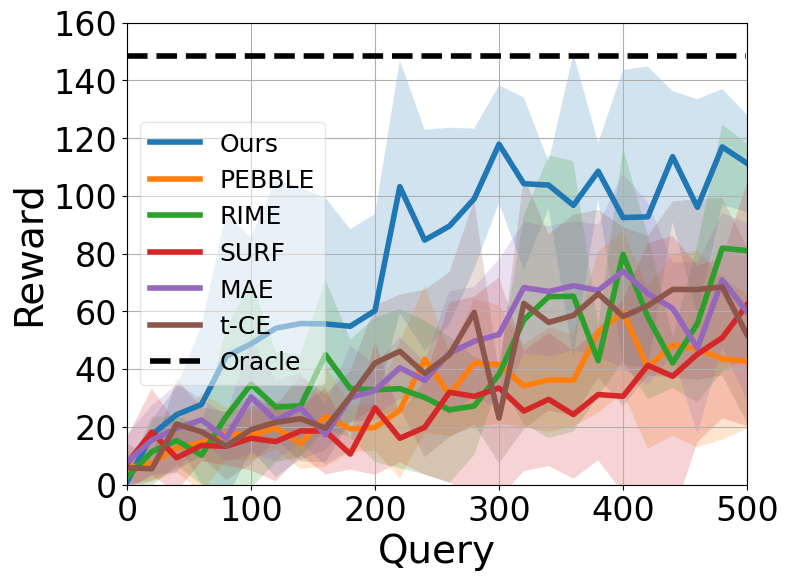

In [68]:
plt.figure(figsize=f_size)
plt.grid()
#plt.title("Cartpole reward: 20% Error")
#plt.title("Cartpole-Swingup",fontsize = 16)
plt.plot(np.arange(0,52,2)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,52,2)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,52,2)*10,results_BT,label='PEBBLE',linewidth = l_wid)
plt.fill_between(np.arange(0,52,2)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)
plt.plot(np.arange(0,52,2)*10,results_RIME,label='RIME',linewidth = l_wid)
plt.fill_between(np.arange(0,52,2)*10,results_RIME-std_RIME,results_RIME+std_RIME,alpha=0.2)
plt.plot(np.arange(0,52,2)*10,results_SURF,label='SURF',linewidth = l_wid)
plt.fill_between(np.arange(0,52,2)*10,results_SURF-std_SURF,results_SURF+std_SURF,alpha=0.2)
plt.plot(np.arange(0,52,2)*10,results_MAE,label='MAE',linewidth = l_wid)
plt.fill_between(np.arange(0,52,2)*10,results_MAE-std_MAE,results_MAE+std_MAE,alpha=0.2)
plt.plot(np.arange(0,52,2)*10,results_tCE,label='t-CE',linewidth = l_wid)
plt.fill_between(np.arange(0,52,2)*10,results_tCE-std_tCE,results_tCE+std_tCE,alpha=0.2)

plt.plot(np.ones(500)*cartpole_gt,label='Oracle',linestyle='dashed', color = 'black',linewidth = l_wid)
plt.legend(fontsize = 18, framealpha=0.5)
plt.ylim(0,160)
plt.xlim(0,500)
plt.xticks(fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)

plt.savefig('../Data/Figs/many_baselines_cartpole_3.jpg',bbox_inches="tight")

In [69]:
#walker
walker_gt = np.load('../Data/Walker/gt.npy')
results_ours =[]
for j in (0,1,2,3,4):
    res = np.load('../Data/Walker/RA/error_2/run_{}/eval_result_1.npz'.format(j))
    results=[]
    for i in range(0,121,5):
        results.append(res[str(i)])
    results_ours.append(results)
std_ours = np.std(results_ours,axis=0)
results_ours = np.mean(results_ours,axis=0)


results_BT = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Walker/BT/error_2/run_{}/eval_result_1.npz'.format(j))
    results=[]
    for i in range(0,121,5):
        results.append(res[str(i)])
    results_BT.append(results)
std_BT = np.std(results_BT,axis=0)
results_BT  = np.mean(results_BT ,axis=0)

results_RIME = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Walker_RIME/error_2/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,121,5):
        results.append(res[str(i)])
    results_RIME.append(results)
std_RIME = np.std(results_RIME,axis=0)
results_RIME  = np.mean(results_RIME ,axis=0)

results_SURF = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Walker_SURF/error_2/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,121,5):
        results.append(res[str(i)])
    results_SURF.append(results)
std_SURF = np.std(results_SURF,axis=0)
results_SURF  = np.mean(results_SURF ,axis=0)

results_MAE = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Walker_MAE/error_2/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,121,5):
        results.append(res[str(i)])
    results_MAE.append(results)
std_MAE = np.std(results_MAE,axis=0)
results_MAE  = np.mean(results_MAE ,axis=0)

results_tCE = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Walker_tCE/error_2/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,121,5):
        results.append(res[str(i)])
    results_tCE.append(results)
std_tCE = np.std(results_tCE,axis=0)
results_tCE  = np.mean(results_tCE ,axis=0)


print('gt',walker_gt)
print('ours', results_ours[-1],std_ours[-1])
print('BT', results_BT[-1],std_BT[-1])
print('RIME', results_RIME[-1],std_RIME[-1])
print('SURF', results_SURF[-1],std_SURF[-1])
print('MAE', results_MAE[-1],std_MAE[-1])
print('tCE', results_tCE[-1],std_tCE[-1])

gt 472.99542
ours 447.06317 14.406908
BT 401.87015 37.631027
RIME 408.39487 24.753939
SURF 397.17682 30.685755
MAE 425.4563 30.211868
tCE 410.75064 19.905142


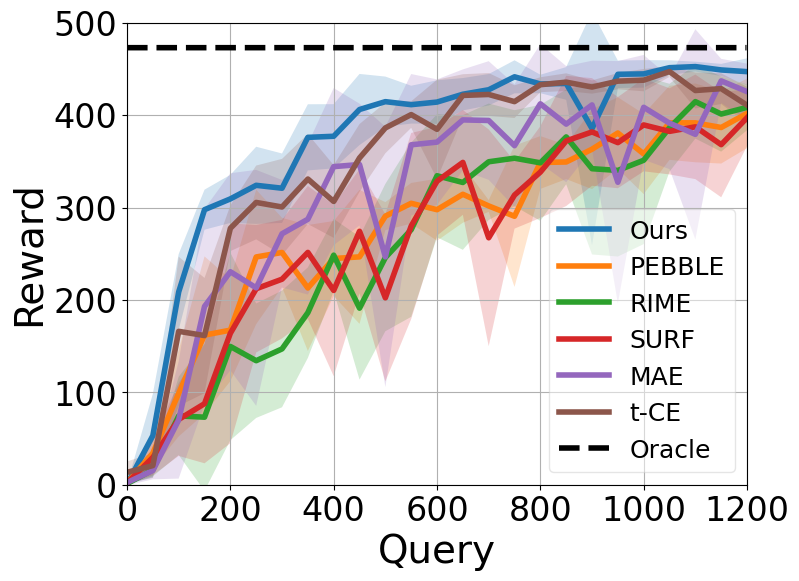

In [70]:
plt.figure(figsize=f_size)
#plt.title("Walker-Walk",fontsize = 16)
plt.grid()
plt.plot(np.arange(0,122,5)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,122,5)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,122,5)*10,results_BT,label='PEBBLE',linewidth = l_wid)
plt.fill_between(np.arange(0,122,5)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)
plt.plot(np.arange(0,122,5)*10,results_RIME,label='RIME',linewidth = l_wid)
plt.fill_between(np.arange(0,122,5)*10,results_RIME-std_RIME,results_RIME+std_RIME,alpha=0.2)
plt.plot(np.arange(0,122,5)*10,results_SURF,label='SURF',linewidth = l_wid)
plt.fill_between(np.arange(0,122,5)*10,results_SURF-std_SURF,results_SURF+std_SURF,alpha=0.2)
plt.plot(np.arange(0,122,5)*10,results_MAE,label='MAE',linewidth = l_wid)
plt.fill_between(np.arange(0,122,5)*10,results_MAE-std_MAE,results_MAE+std_MAE,alpha=0.2)
plt.plot(np.arange(0,122,5)*10,results_tCE,label='t-CE',linewidth = l_wid)
plt.fill_between(np.arange(0,122,5)*10,results_tCE-std_tCE,results_tCE+std_tCE,alpha=0.2)

plt.plot(np.ones(1200)*walker_gt,label='Oracle',linestyle='dashed', color = 'black',linewidth = l_wid)

#plt.legend()
plt.legend(fontsize = 18, framealpha=0.5)

plt.ylim(0,500)
plt.xlim(0,1200)
plt.xticks(fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)

plt.savefig('../Data/Figs/many_baselines_walker_2.jpg',bbox_inches="tight")

In [71]:
results_ours = []
for j in (0,1,2,3,4):
    res = np.load('../Data/Walker/RA/error_3/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,121,5):
        results.append(res[str(i)])
    results_ours.append(results)
std_ours = np.std(results_ours,axis=0)
results_ours = np.mean(results_ours,axis=0)


results_BT = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Walker/BT/error_3/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,121,5):
        results.append(res[str(i)])
    results_BT.append(results)
std_BT = np.std(results_BT,axis=0)
results_BT  = np.mean(results_BT ,axis=0)

results_RIME = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Walker_RIME/error_3/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,121,5):
        results.append(res[str(i)])
    results_RIME.append(results)
std_RIME = np.std(results_RIME,axis=0)
results_RIME  = np.mean(results_RIME ,axis=0)

results_SURF = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Walker_SURF/error_3/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,121,5):
        results.append(res[str(i)])
    results_SURF.append(results)
std_SURF = np.std(results_SURF,axis=0)
results_SURF  = np.mean(results_SURF ,axis=0)

results_MAE = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Walker_MAE/error_3/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,121,5):
        results.append(res[str(i)])
    results_MAE.append(results)
std_MAE = np.std(results_MAE,axis=0)
results_MAE  = np.mean(results_MAE ,axis=0)

results_tCE = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Walker_tCE/error_3/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,121,5):
        results.append(res[str(i)])
    results_tCE.append(results)
std_tCE = np.std(results_tCE,axis=0)
results_tCE  = np.mean(results_tCE ,axis=0)

print('gt',walker_gt)
print('ours', results_ours[-1],std_ours[-1])
print('BT', results_BT[-1],std_BT[-1])
print('RIME', results_RIME[-1],std_RIME[-1])
print('SURF', results_SURF[-1],std_SURF[-1])
print('MAE', results_MAE[-1],std_MAE[-1])
print('tCE', results_tCE[-1],std_tCE[-1])

gt 472.99542
ours 417.1928 12.260955
BT 277.01343 62.29897
RIME 310.24835 84.09577
SURF 291.9525 69.0329
MAE 288.30978 138.78413
tCE 345.59918 52.2206


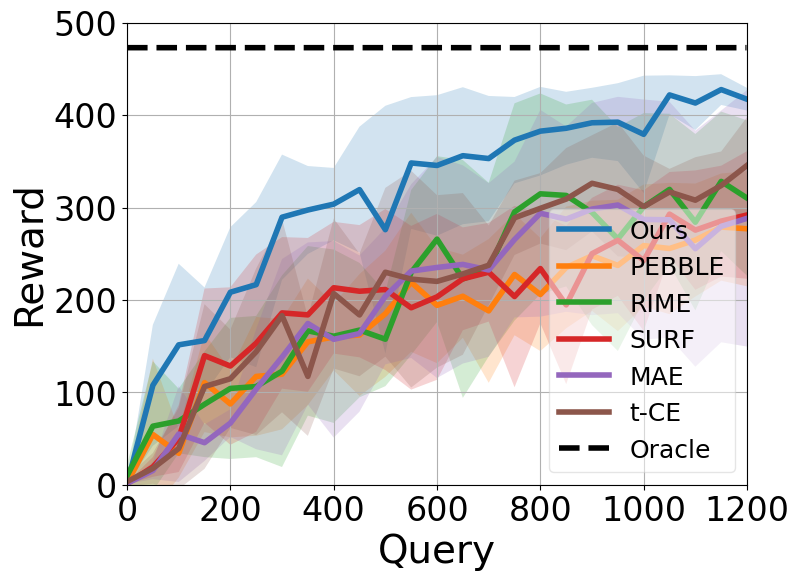

In [72]:
plt.figure(figsize=f_size)

plt.grid()
plt.plot(np.arange(0,122,5)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,122,5)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,122,5)*10,results_BT,label='PEBBLE',linewidth = l_wid)
plt.fill_between(np.arange(0,122,5)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)
plt.plot(np.arange(0,122,5)*10,results_RIME,label='RIME',linewidth = l_wid)
plt.fill_between(np.arange(0,122,5)*10,results_RIME-std_RIME,results_RIME+std_RIME,alpha=0.2)
plt.plot(np.arange(0,122,5)*10,results_SURF,label='SURF',linewidth = l_wid)
plt.fill_between(np.arange(0,122,5)*10,results_SURF-std_SURF,results_SURF+std_SURF,alpha=0.2)
plt.plot(np.arange(0,122,5)*10,results_MAE,label='MAE',linewidth = l_wid)
plt.fill_between(np.arange(0,122,5)*10,results_MAE-std_MAE,results_MAE+std_MAE,alpha=0.2)
plt.plot(np.arange(0,122,5)*10,results_tCE,label='t-CE',linewidth = l_wid)
plt.fill_between(np.arange(0,122,5)*10,results_tCE-std_tCE,results_tCE+std_tCE,alpha=0.2)

plt.plot(np.ones(1200)*walker_gt,label='Oracle',linestyle='dashed', color = 'black',linewidth = l_wid)

plt.legend(fontsize = 18, framealpha=0.5)

plt.ylim(0,500)
plt.xlim(0,1200)
plt.xticks(fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)

plt.savefig('../Data/Figs/many_baselines_walker_3.jpg',bbox_inches="tight")